## Import Libraries


In [93]:
import numpy as np
import seaborn as sns
import pickle
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


## EDA


In [119]:
# #read data
df = pd.read_csv('../data/df_with_target.csv')
print(df.shape)
df.head(5)

(1898195, 19)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_action
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,NaN
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,NaN
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,NaN
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1.0,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,NaN
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2.0,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,NaN


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898195 entries, 0 to 1898194
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 object 
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              float64
 5   utm_source                object 
 6   utm_medium                object 
 7   utm_campaign              object 
 8   utm_adcontent             object 
 9   utm_keyword               object 
 10  device_category           object 
 11  device_os                 object 
 12  device_brand              object 
 13  device_model              object 
 14  device_screen_resolution  object 
 15  device_browser            object 
 16  geo_country               object 
 17  geo_city                  object 
 18  event_action              object 
dtypes: float64(1), object(18)
memory usage: 275.2+ MB


In [121]:
#checking NaN values
df.isnull().sum().sort_values(ascending=False)

device_model                1881588
event_action                1809728
utm_keyword                 1106897
device_os                   1094827
device_brand                 376392
utm_adcontent                344410
utm_campaign                 227290
utm_source                     1190
visit_time                     1088
visit_number                   1088
utm_medium                     1088
client_id                      1088
device_category                1088
visit_date                     1088
device_screen_resolution       1088
device_browser                 1088
geo_country                    1088
geo_city                       1088
session_id                        0
dtype: int64

In [122]:
#View missing values in persent
missing_values(df)

device_model                99.13
event_action                95.34
utm_keyword                 58.31
device_os                   57.68
device_brand                19.83
utm_adcontent               18.14
utm_campaign                11.97
utm_source                   0.06
visit_time                   0.06
visit_number                 0.06
utm_medium                   0.06
client_id                    0.06
device_category              0.06
visit_date                   0.06
device_screen_resolution     0.06
device_browser               0.06
geo_country                  0.06
geo_city                     0.06
session_id                   0.00
dtype: float64

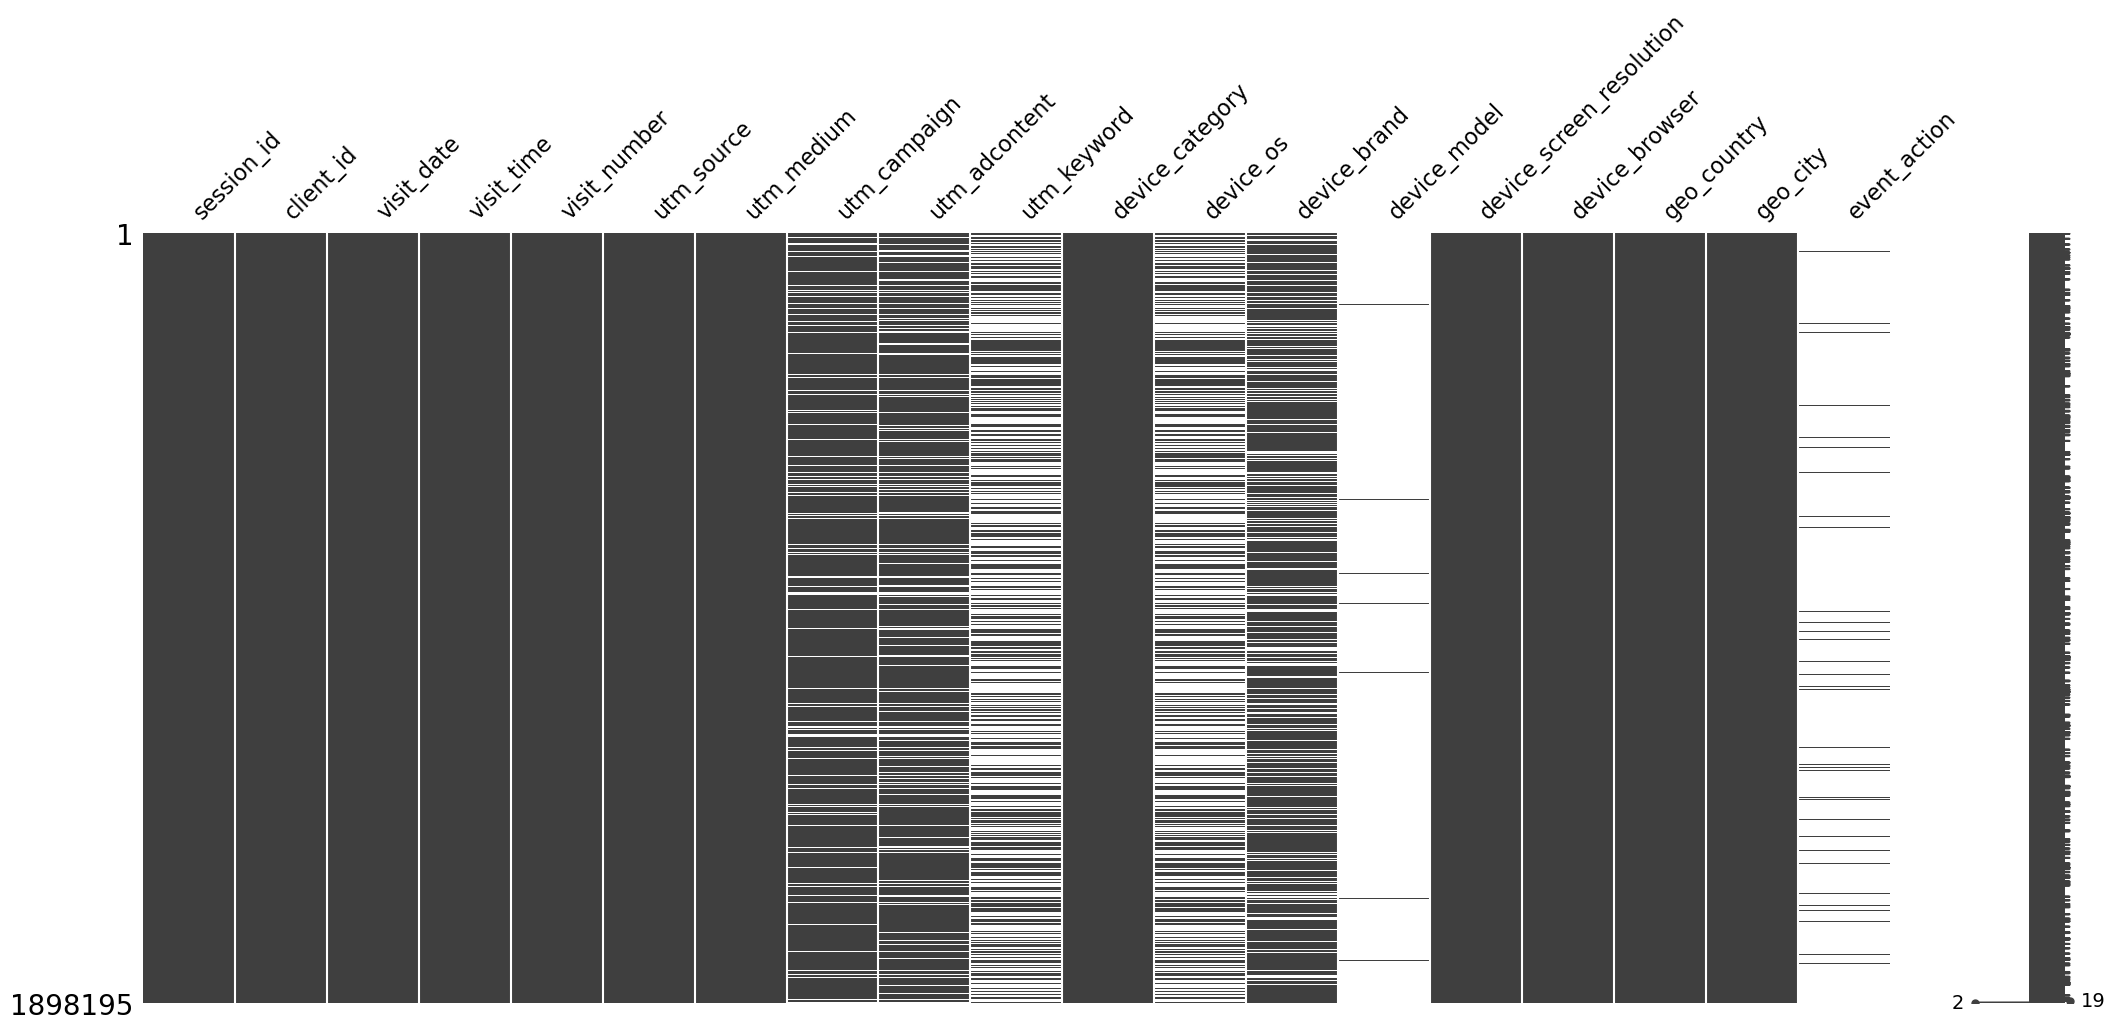

In [123]:
#visualisation missing values
msno.matrix(df);